In [50]:
import h5py
%pylab inline
import sklearn.preprocessing
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [16]:
cd /home/chenxupeng/projects/mcm/

/home/chenxupeng/projects/mcm


In [17]:
with h5py.File('densearrayL3_1_DVA_FIN.h5') as f:
    print f.keys()

[u'country', u'dense', u'notes']


In [25]:
#打开h5文件，根据keys索引出存储的内容
with h5py.File('densearrayL3_1_DVA_FIN.h5') as f:
    countryname = f['country'][:]
    data = f['dense'][:]
    notes = f['notes'][:]

In [21]:
countryname

array(['AUS', 'AUT', 'BEL', 'BGR', 'BRA', 'CAN', 'PRC', 'CYP', 'CZE',
       'DEU', 'DNK', 'ESP', 'EST', 'FIN', 'FRA', 'GBR', 'GRC', 'HUN',
       'IDN', 'IND', 'IRL', 'ITA', 'JPN', 'KOR', 'LTU', 'LUX', 'LVA',
       'MEX', 'MLT', 'NLD', 'POL', 'PRT', 'ROM', 'RUS', 'SVK', 'SVN',
       'SWE', 'TUR', 'TAP', 'USA', 'BAN', 'MAL', 'PHI', 'THA', 'VIE',
       'MON', 'SRI', 'RoW'],
      dtype='|S32')

In [23]:
#使用np.where找到需要的国家的编号，这种方法比条件语句更有效
np.where(countryname=='USA')[0][0]

array([39])

In [26]:
data.shape

(48, 48, 35, 35)

In [31]:
#USA对其他所有48个国家：
data[39,:].shape

(48, 35, 35)

In [38]:
#USA对其他某个国家 eg AUS：
data[39,np.where(countryname=='AUS')[0][0]].shape

(35, 35)

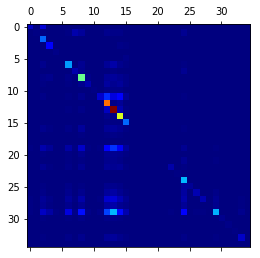

In [41]:
matshow(data[39,np.where(countryname=='AUS')[0][0]],cmap=cm.jet)

In [45]:
data[np.where(countryname=='USA')[0][0]].shape

(48, 35, 35)

In [51]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

Text(0.5,1.05,u'AUS to USA data scaled')

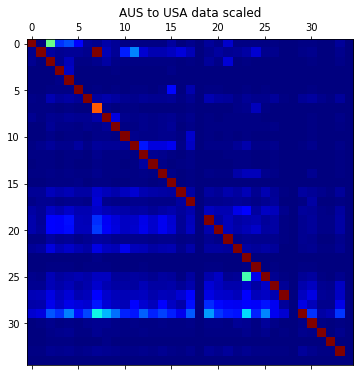

In [54]:
#同理，其他国家对USA
fig,ax=plt.subplots(1,figsize=(6,6))
aus_usa_data = data[np.where(countryname=='AUS')[0][0],np.where(countryname=='USA')[0][0]]
transformeddata = scaler.fit_transform(aus_usa_data)  #对数据做scale
ax.matshow(transformeddata,cmap=cm.jet)
ax.set_title('AUS to USA data scaled')